In [6]:
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [7]:
current_dir = os.getcwd()

In [ ]:
try : 
    os.chdir(f'{current_dir}/Spotify_Radar_Playlist')
except Exception as e : 
    None

In [9]:
os.getcwd()

'c:\\Users\\bigbo\\Documents\\Computer Science\\00. Projets\\spotify_radar_playlist\\Spotify_Radar_Playlist'

In [18]:
df_track_info = pd.read_csv('stats/weekly_tracks_popularity.txt',sep=";")

#for mapping artist name and id to trakcs
df_track_artist = pd.read_csv('stats/weekly_tracks_artists.txt',sep=";")

#artist number of followers and popularity
df_artist_data = pd.read_csv('stats/weekly_artists_data.txt',sep=",")

df_genre = pd.read_csv('stats/weekly_artists_genres_agg.txt',sep=";")



In [ ]:
df_spotify = df_track_info.merge(right=df_track_artist,on="track_id")
df_spotify = df_spotify.merge(right=df_artist_data,on="artist_id")
df_spotify = df_spotify.merge(right=df_genre,on="artist_id")

In [20]:
df_spotify.head()

,track_id,popularity,track_name,artist_id,artist_name,total_follower,artist_popularity,artist_genres,artist_genre_main
0,2OY0kiBOqudHNM0Dt0Z4Rf,21,Mood Ring,4eR9k3I0YKCQUvvP2ojptw,Joan Shelley,36012,37,[],other
1,3F5OqjgjabK52aEaKnY73e,24,eric adams in the club,6tpaMMCs8X6o8j9H5OmWmT,Yaya Bey,115659,52,[],other
2,3F5OqjgjabK52aEaKnY73e,24,eric adams in the club,1MRB7UrVK6DvvefA7pAqS8,Exaktly,106,17,[],other
3,1iOaaSRsQModxydHxz96Np,2,Winds Of Change,33swwbOrC7iMmPF3TXGLNi,Aiza,6115,25,[],other
4,1iOaaSRsQModxydHxz96Np,2,Winds Of Change,1SXilrjOlDsfjsSLP2mBFk,C The Reason,8,1,[],other


In [21]:
df_genre_pie = df_spotify[['artist_id','artist_genre_main']].groupby("artist_genre_main").count().reset_index()
df_genre_pie.head()

,artist_genre_main,artist_id
0,electro,55
1,folk_acoustic,11
2,hip_hop_rnb_soul_afro,167
3,jazz,18
4,metal,75


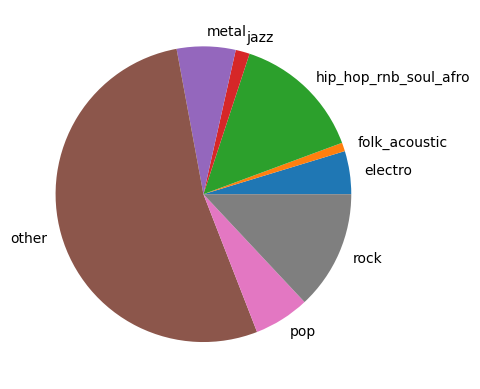

In [22]:
plt.figure()
plt.pie(x=df_genre_pie['artist_id'],labels=df_genre_pie['artist_genre_main'])
plt.show()

top 10 most popular tracks

In [26]:
df_popular_track = df_spotify[['track_name','popularity']].drop_duplicates(subset="track_name").sort_values(by="popularity",ascending=False).head(10)
df_popular_track.head(10)

,track_name,popularity
479,BIRDS OF A FEATHER,96
581,APT.,95
851,Timeless (with Playboi Carti),93
28,Si Antes Te Hubiera Conocido,92
261,"Good Luck, Babe!",92
289,Taste,90
603,"Sticky (feat. GloRilla, Sexyy Red & Lil Wayne)",89
511,PUSH 2 START,86
1030,30 For 30 (with Kendrick Lamar),85
671,Disease,82
